In [1]:
from supervised_utils import *

In [2]:
# sopprimi i warning a runtime
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)

### Task di regressione su `score`

In [3]:
df = pd.read_csv("../data/movies_features_reg_last30.csv")
print_info(df)

# cols: 20 | # rows: 4046

+-----------------------+---------+
|        Column         |  Type   |
+-----------------------+---------+
|          id           |  int64  |
|         title         | object  |
|          age          |  int64  |
|      rating_cat       | object  |
|       genre_cat       | object  |
|        runtime        | float64 |
|      popularity       | float64 |
|         score         | float64 |
|        budget         | float64 |
|   budget_efficiency   | float64 |
|     director_age      | float64 |
|  director_experience  |  int64  |
| director_is_acclaimed |  bool   |
|  director_is_panned   |  bool   |
|  director_efficiency  | float64 |
|       star_age        | float64 |
|    star_experience    |  int64  |
|   star_is_acclaimed   |  bool   |
|    star_is_panned     |  bool   |
|    star_efficiency    | float64 |
+-----------------------+---------+


In [4]:
# colonne per il training
cols = {
    "target": "score",
    "drop": ["id", "title"],
    "dummies": ["rating_cat", "genre_cat"],
    "labels": [],
    "standardize": ["runtime", "director_age", "star_age"],
    "minmax": ["popularity", "budget", "director_experience", "star_experience"]
}

***

TUNING & TRAINING <Ridge Regressor>...

Results after GridSearchCV:
Best parameters: {'alpha': 0.5}
Best score: {'mean_squared_error': 0.4926}

> TESTING...
MAE: 0.5378
MSE: 0.5462

***

TUNING & TRAINING <Decision Tree Regressor>...

Results after GridSearchCV:
Best parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 10}
Best score: {'mean_squared_error': 0.5237}

Results after max_depth tuning:
Best parameters: {'max_depth': 8}
Best score: {'mean_squared_error': 0.5090}



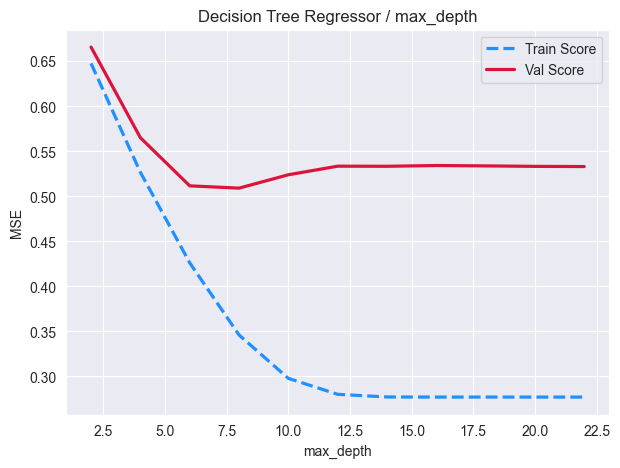

> TESTING...
MAE: 0.5911
MSE: 0.6693

***

TUNING & TRAINING <Random Forest Regressor>...

Results after GridSearchCV:
Best parameters: {'criterion': 'squared_error', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Best score: {'mean_squared_error': 0.3895}

Results after n_estimators tuning:
Best parameters: {'n_estimators': 200}
Best score: {'mean_squared_error': 0.3901}



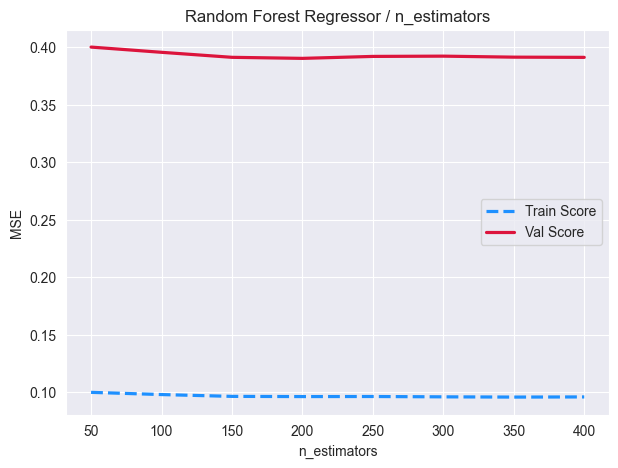

Results after max_depth tuning:
Best parameters: {'max_depth': 17}
Best score: {'mean_squared_error': 0.3892}



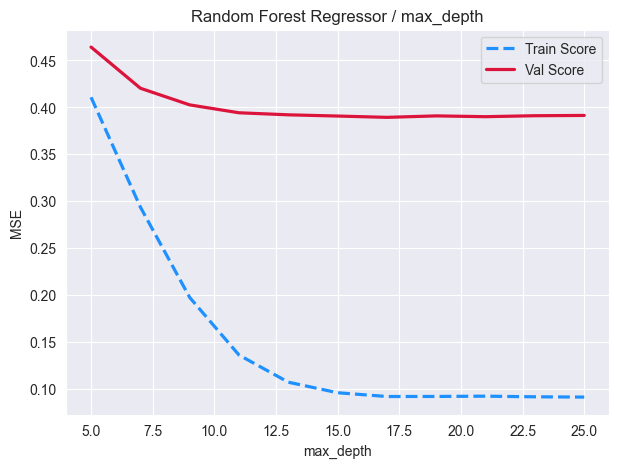

> TESTING...
MAE: 0.4808
MSE: 0.4633

***

TUNING & TRAINING <XGBoost Regressor>...

Results after GridSearchCV:
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.6}
Best score: {'mean_squared_error': 0.3729}

Results after n_estimators tuning:
Best parameters: {'n_estimators': 250}
Best score: {'mean_squared_error': 0.3727}



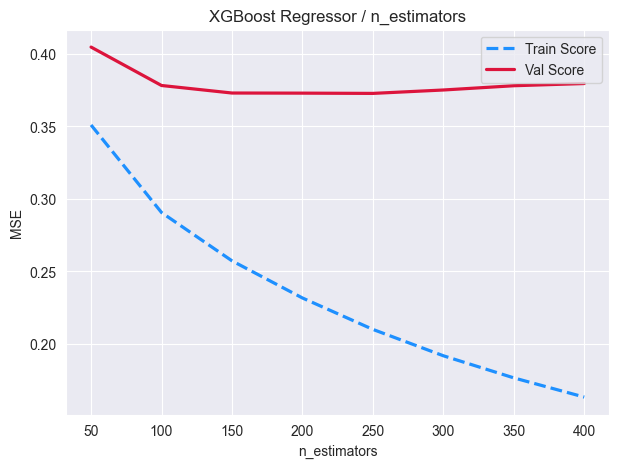

Results after max_depth tuning:
Best parameters: {'max_depth': 2}
Best score: {'mean_squared_error': 0.3758}



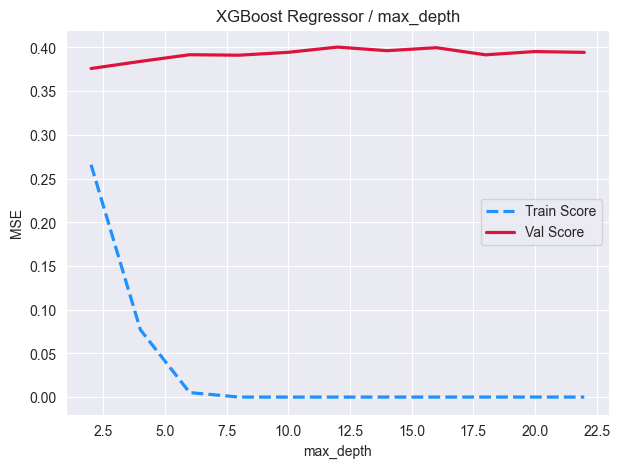

> TESTING...
MAE: 0.4819
MSE: 0.4830



In [5]:
# tuning e testing
tune_and_test_models(df, cols, task="regression", session_name="v2")

### Task di classificazione su `budget_efficiency`

In [6]:
df = pd.read_csv("../data/movies_features_cls_last30.csv")
print_info(df)

# cols: 20 | # rows: 4046

+-----------------------+---------+
|        Column         |  Type   |
+-----------------------+---------+
|          id           |  int64  |
|         title         | object  |
|          age          |  int64  |
|      rating_cat       | object  |
|       genre_cat       | object  |
|        runtime        | float64 |
|      popularity       | float64 |
|         score         | float64 |
|        budget         | float64 |
| budget_efficiency_cat | object  |
|     director_age      | float64 |
|  director_experience  |  int64  |
| director_is_acclaimed |  bool   |
|  director_is_panned   |  bool   |
|  director_efficiency  | float64 |
|       star_age        | float64 |
|    star_experience    |  int64  |
|   star_is_acclaimed   |  bool   |
|    star_is_panned     |  bool   |
|    star_efficiency    | float64 |
+-----------------------+---------+


In [7]:
# colonne per il training
cols = {
    "target": "budget_efficiency_cat",
    "drop": ["id", "title"],
    "dummies": ["rating_cat", "genre_cat"],
    "labels": [],
    "standardize": ["runtime", "director_age", "star_age"],
    "minmax": ["popularity", "budget", "director_experience", "star_experience"]
}

#### Con classi sbilanciate

In [8]:
# tuning e testing
tune_and_test_models(df, cols, task="classification", resample=False, session_name="v2")

***

TUNING & TRAINING <Logistic Regression>...



KeyError: 'Logistic_Regression'

#### Con classi bilanciate

In [ ]:
# tuning e testing
tune_and_test_models(df, cols, task="classification", resample=True, session_name="v2(resampled)")